
Principal Component Analysis
================================

Principal Component Analysis (PCA) is an often-used tool in astronomy and other data-intensive sciences. In a sense, it automates the trial-and-error process discussed in the previous section, and finds the most interesting linear combinations of attributes, so that high-dimensional data can be visualized in a 2D or 3D plot. Scikit-learn has methods to compute PCA and several variants. 

Classic PCA (sklearn.decomposition.PCA) is based on an eigenvalue decomposition of the data covariance, so that for N points, the computational cost grows as $\mathcal{O}[N^3]$. This means that for large datasets like the current one, the fit can be very slow. You can try it as follows, but the computation may take up to several minutes for this dataset:




In [1]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X = normalize(data['X'])
X_projected = pca.fit_transform(X)  # warning: this takes a long time!


NameError: name 'normalize' is not defined

In [ ]:
Fortunately, scikit-learn has an alternative method that is much faster. The speed comes at a price: it is based on random projections, so the results are not as robust as the normal method. But for tasks such as ours where we are seeking only a few of a large number of eigenvectors, it performs fairly well. To keep our results consistent between runs, we’ll explicitly set the random seed for the fit. You should repeat this with several different random seeds to convince yourself that the results are consistent:


In [ ]:

from sklearn.decomposition import RandomizedPCA
rpca = RandomizedPCA(n_components=4, random_state=0)
X_proj = rpca.fit_transform(X)
X_proj.shape
(4000, 4)


In [ ]:
%===================================================================================== %
% - http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

sklearn.decomposition.PCA
class sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False)
###Principal component analysis (PCA)}

Linear dimensionality reduction using \textit{Singular Value Decomposition} of the data and keeping only the most significant singular vectors to project the data to a lower dimensional space.

This implementation uses the \texttt{scipy.linalg} implementation of the singular value decomposition. It only works for dense arrays and is not scalable to large dimensional data.
The time complexity of this implementation is O(n ** 3) assuming n ~ n_samples ~ n_features.

%============================================================================= %
###Parameters:}	

\item n\_components : int, None or string
Number of components to keep. if n_components is not set all components are kept:
n_components == min(n_samples, n_features)
if n_components == ‘mle’, Minka’s MLE is used to guess the dimension if $0 < n_components < 1$, select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components
\item copy : bool
If False, data passed to fit are overwritten and running fit(X).transform(X) will not yield the expected results, use fit_transform(X) instead.
\item whiten : bool, optional
When True (False by default) the components_ vectors are divided by n_samples times singular values to ensure uncorrelated outputs with unit component-wise variances.


Whitening will remove some information from the transformed signal (the relative variance scales of the components) but can sometime improve the predictive accuracy of the downstream estimators by making there data respect some hard-wired assumptions.
Attributes:	
`components_` : array, [n_components, n_features]
Components with maximum variance.
`explained_variance_ratio_` : array, [n_components]
Percentage of variance explained by each of the selected components. k is not set then all components are stored and the sum of explained variances is equal to 1.0
`mean_` : array, [n_features]
Per-feature empirical mean, estimated from the training set.
`n_components_` : int
The estimated number of components. Relevant when n_components is set to ‘mle’ or a number between 0 and 1 to select using explained variance.
`noise_variance_` : float

The estimated noise covariance following the Probabilistic PCA model from Tipping and Bishop 1999. See “Pattern Recognition and Machine Learning” by C. Bishop, 12.2.1 p. 574 or http://www.miketipping.com/papers/met-mppca.pdf. It is required to computed the estimated data covariance and score samples.
See also ProbabilisticPCA, RandomizedPCA, KernelPCA, SparsePCA, TruncatedSVD

### Notes
For ``n_components="mle"``, this class uses the method of Thomas P. Minka: Automatic Choice of Dimensionality for PCA. NIPS 2000: 598-604

Implements the probabilistic PCA model from: M. Tipping and C. Bishop, Probabilistic Principal Component Analysis, Journal of the Royal Statistical Society, Series B, 61, Part 3, pp. 611-622 via the score and score_samples methods. See http://www.miketipping.com/papers/met-mppca.pdf

Due to implementation subtleties of the Singular Value Decomposition (SVD), which is used in this implementation, running fit twice on the same matrix can lead to principal components with signs flipped (change in direction). For this reason, it is important to always use the same estimator object to transform data in a consistent fashion.
### Examples 

In [7]:

import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)
PCA(copy=True, n_components=2, whiten=False)
print(pca.explained_variance_ratio_) 


[ 0.99244289  0.00755711]


In [ ]:
### Methods
fit(X[, y])	Fit the model with X.
fit_transform(X[, y])	Fit the model with X and apply the dimensionality reduction on X.
get_covariance()	Compute data covariance with the generative model.
get_params([deep])	Get parameters for this estimator.
get_precision()	Compute data precision matrix with the generative model.
inverse_transform(X)	Transform data back to its original space, i.e.,
score(X[, y])	Return the average log-likelihood of all samples
score_samples(X)	Return the log-likelihood of each sample
set_params(**params)	Set the parameters of this estimator.
transform(X)	Apply the dimensionality reduction on X.
__init__(n_components=None, copy=True, whiten=False)
fit(X, y=None)
Fit the model with X.
Parameters:	
X: array-like, shape (n_samples, n_features) :
Training data, where n_samples in the number of samples and n_features is the number of features.
Returns:	
self : object
Returns the instance itself.
fit_transform(X, y=None)
Fit the model with X and apply the dimensionality reduction on X.
Parameters:	
X : array-like, shape (n_samples, n_features)
Training data, where n_samples is the number of samples and n_features is the number of features.
Returns:	
X_new : array-like, shape (n_samples, n_components)
get_covariance()
Compute data covariance with the generative model.
cov = components_.T * S**2 * components_ + sigma2 * eye(n_features) where S**2 contains the explained variances.
Returns:	
cov : array, shape=(n_features, n_features)
Estimated covariance of data.
get_params(deep=True)
Get parameters for this estimator.
Parameters:	
deep: boolean, optional :
If True, will return the parameters for this estimator and contained subobjects that are estimators.
Returns:	
params : mapping of string to any
Parameter names mapped to their values.
get_precision()
Compute data precision matrix with the generative model.
Equals the inverse of the covariance but computed with the matrix inversion lemma for efficiency.
Returns:	
precision : array, shape=(n_features, n_features)
Estimated precision of data.



In [ ]:
#### ``inverse_transform(X)``
Transform data back to its original space, i.e., return an input X_original whose transform would be X
Parameters:	
X : array-like, shape (n_samples, n_components)
New data, where n_samples is the number of samples and n_components is the number of components.
Returns:	
X_original array-like, shape (n_samples, n_features) :
Notes
If whitening is enabled, inverse_transform does not compute the exact inverse operation as transform.
score(X, y=None)
Return the average log-likelihood of all samples
See. “Pattern Recognition and Machine Learning” by C. Bishop, 12.2.1 p. 574 or http://www.miketipping.com/papers/met-mppca.pdf
Parameters:	
X: array, shape(n_samples, n_features) :
The data.
Returns:	
ll: float :
Average log-likelihood of the samples under the current model

#### ``score_samples(X)``
Return the log-likelihood of each sample
See. “Pattern Recognition and Machine Learning” by C. Bishop, 12.2.1 p. 574 or http://www.miketipping.com/papers/met-mppca.pdf
Parameters:	
X: array, shape(n_samples, n_features) :
The data.
Returns:	
ll: array, shape (n_samples,) :
Log-likelihood of each sample under the current model
set_params(**params)
Set the parameters of this estimator.
The method works on simple estimators as well as on nested objects (such as pipelines). The former have parameters of the form <component>__<parameter> so that it’s possible to update each component of a nested object.
Returns:	self :

#### ``transform(X)``
Apply the dimensionality reduction on X.

X is projected on the first principal components previous extracted from a training set.

***Parameters:***

* X : array-like, shape (n_samples, n_features)
New data, where n_samples is the number of samples and n_features is the number of features.

Returns:

* X_new : array-like, shape (n_samples, n_components)




## PCA example with Iris Data-set
Principal Component Analysis applied to the Iris dataset.

** http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html **



In [3]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)



In [ ]:
plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
    X[y == label, 1].mean() + 1.5,
    X[y == label, 2].mean(), name,
    horizontalalignment='center',
    bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))


In [4]:
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral)

x_surf = [X[:, 0].min(), X[:, 0].max(),
X[:, 0].min(), X[:, 0].max()]
y_surf = [X[:, 0].max(), X[:, 0].max(),
X[:, 0].min(), X[:, 0].min()]
x_surf = np.array(x_surf)
y_surf = np.array(y_surf)

In [5]:

v0 = pca.transform(pca.components_[0])
v0 /= v0[-1]
v1 = pca.transform(pca.components_[1])
v1 /= v1[-1]



/home/nbuser/anaconda3_431/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/nbuser/anaconda3_431/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


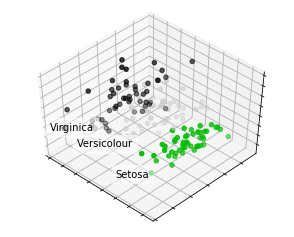

In [6]:
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()


* http://sebastianraschka.com/Articles/2014_pca_step_by_step.html
* http://www.astroml.org/sklearn_tutorial/dimensionality_reduction.html
